In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/disney_movies.csv")

In [ ]:
# 2. Ver informações básicas
print("Colunas disponíveis:", df.columns)
print("\nTotal de registros:", len(df))
print("\nResumo do dataset:")
print(df.info())


Colunas disponíveis: Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

Total de registros: 579

Resumo do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB
None


In [16]:
# 3. Verificar valores faltantes (mas sem remover nada)
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
year                         0
dtype: int64


In [6]:
# Remover símbolos e converter para número
df['inflation_adjusted_gross'] = (
    df['inflation_adjusted_gross']
    .replace('[\$,]', '', regex=True)   # remove $ e vírgulas
    .astype(float)                      # converte para float
)

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Lu762\AppData\Local\Temp\ipykernel_13048\945541065.py:4: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)   # remove $ e vírgulas


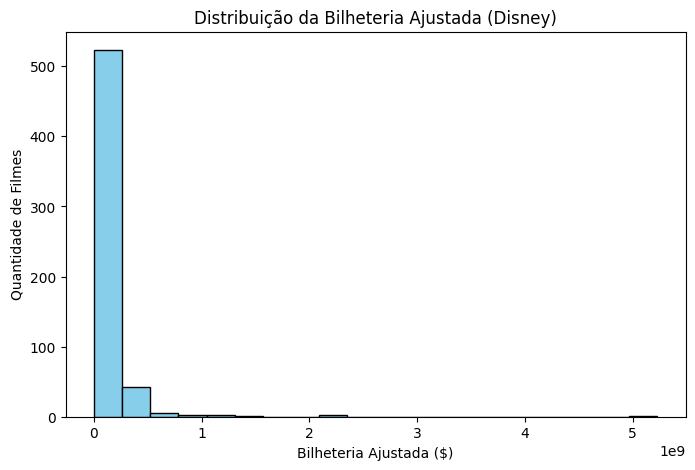

In [7]:
# 4. Gráfico 1 — Distribuição da bilheteria ajustada pela inflação
plt.figure(figsize=(8,5))
plt.hist(df['inflation_adjusted_gross'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Bilheteria Ajustada (Disney)')
plt.xlabel('Bilheteria Ajustada ($)')
plt.ylabel('Quantidade de Filmes')
plt.show()


In [15]:
coe = df['release_date']
print(coe)

0      1937-12-21
1      1940-02-09
2      1940-11-13
3      1946-11-12
4      1950-02-15
          ...    
574    2016-09-02
575    2016-09-23
576    2016-11-04
577    2016-11-23
578    2016-12-16
Name: release_date, Length: 579, dtype: object


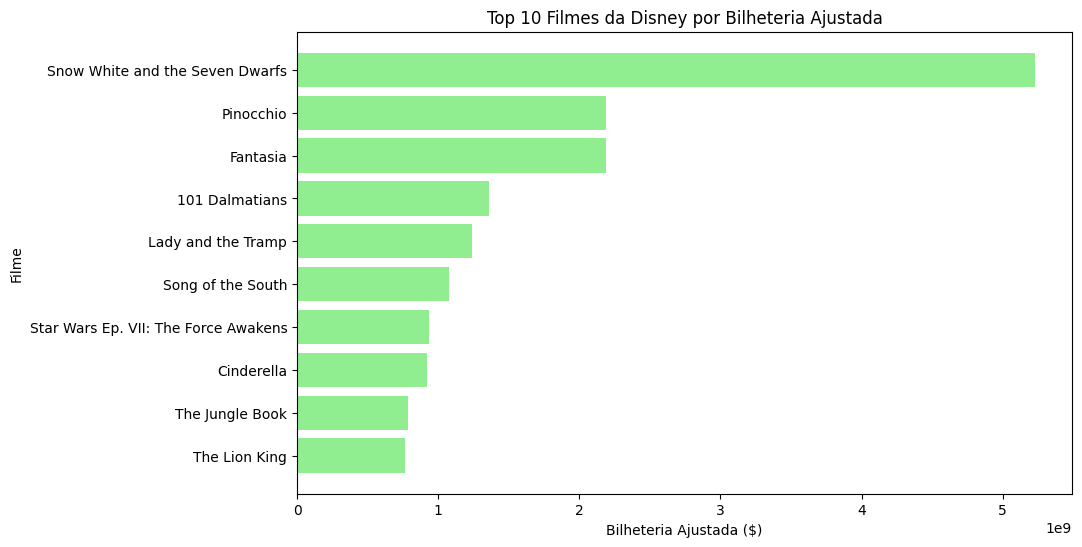

In [8]:
# 5. Gráfico 2 — Top 10 filmes da Disney com maior bilheteria ajustada
top10 = df.sort_values(by='inflation_adjusted_gross', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10['movie_title'], top10['inflation_adjusted_gross'], color='lightgreen')
plt.title('Top 10 Filmes da Disney por Bilheteria Ajustada')
plt.xlabel('Bilheteria Ajustada ($)')
plt.ylabel('Filme')
plt.gca().invert_yaxis()
plt.show()


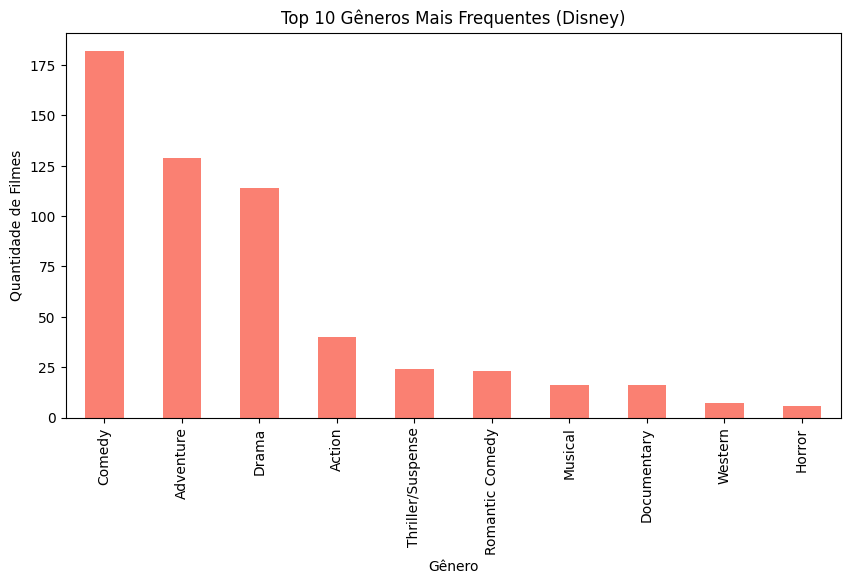

In [9]:
# 6. Gráfico 3 — Gêneros mais frequentes
plt.figure(figsize=(10,5))
df['genre'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Gêneros Mais Frequentes (Disney)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Filmes')
plt.show()


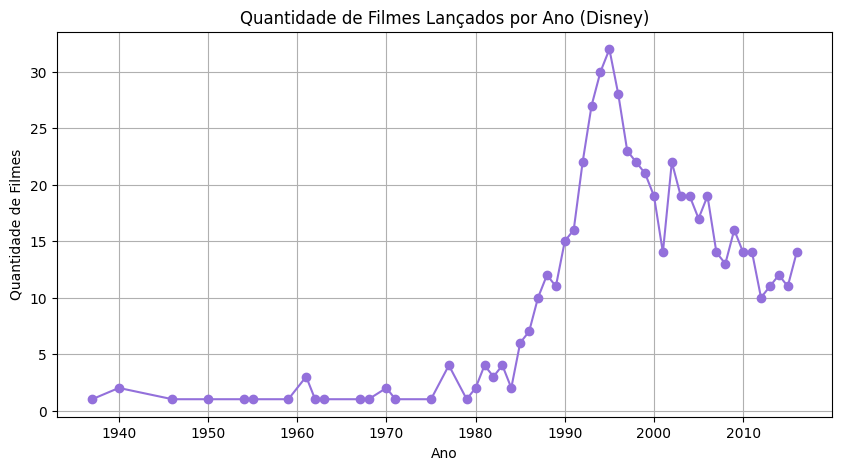

In [10]:
# 7. (Opcional) Gráfico 4 — Quantidade de filmes lançados por ano
# Primeiro, extrair o ano da coluna de data, se possível
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10,5))
df['year'].value_counts().sort_index().plot(kind='line', marker='o', color='mediumpurple')
plt.title('Quantidade de Filmes Lançados por Ano (Disney)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.grid(True)
plt.show()

In [11]:
print(df['year'].unique())
print(df['year'].value_counts())


[1937 1940 1946 1950 1954 1955 1959 1961 1962 1963 1967 1968 1970 1971
 1975 1977 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
year
1995    32
1994    30
1996    28
1993    27
1997    23
1992    22
2002    22
1998    22
1999    21
2000    19
2004    19
2003    19
2006    19
2005    17
1991    16
2009    16
1990    15
2010    14
2001    14
2016    14
2011    14
2007    14
2008    13
1988    12
2014    12
2013    11
2015    11
1989    11
1987    10
2012    10
1986     7
1985     6
1981     4
1983     4
1977     4
1961     3
1982     3
1940     2
1970     2
1980     2
1984     2
1975     1
1963     1
1979     1
1962     1
1959     1
1946     1
1950     1
1954     1
1937     1
1955     1
1967     1
1968     1
1971     1
Name: count, dtype: int64
